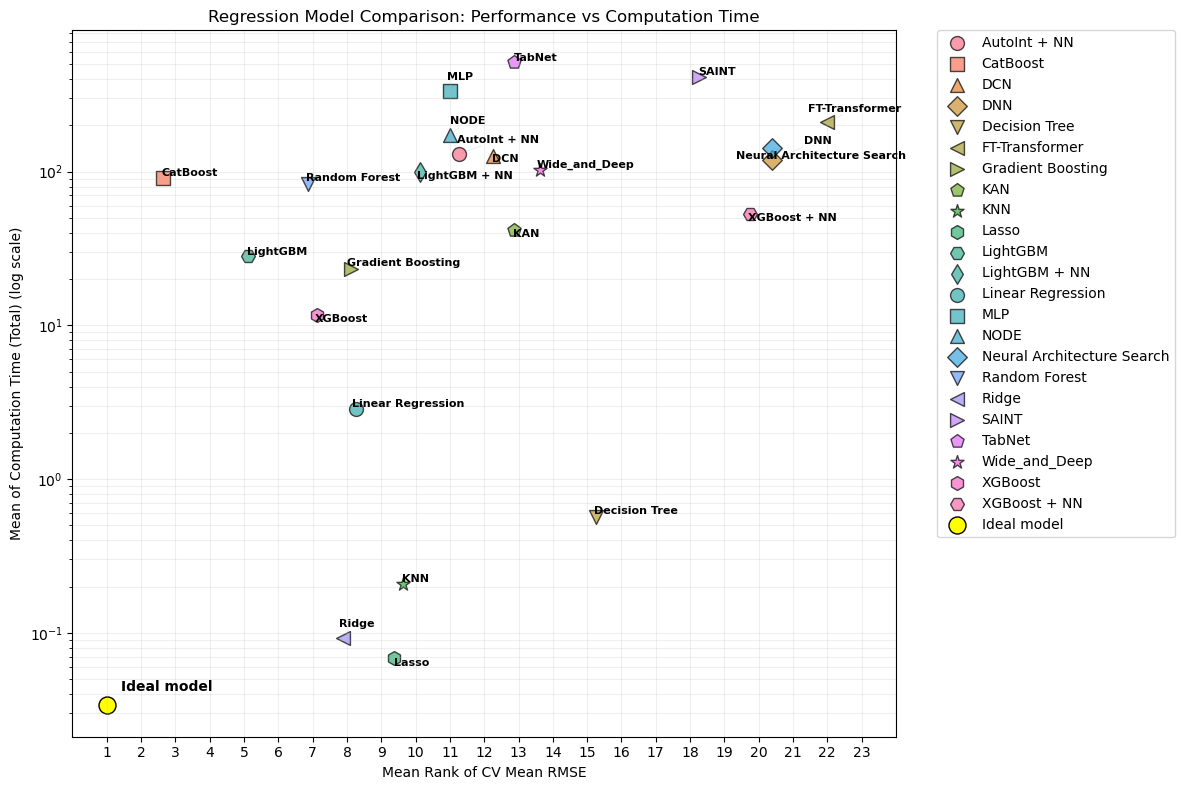

                            Mean Rank of CV Mean RMSE  \
CatBoost                                        2.625   
LightGBM                                        5.125   
Random Forest                                   6.875   
XGBoost                                         7.125   
Ridge                                           7.875   
Gradient Boosting                               8.125   
Linear Regression                               8.250   
Lasso                                           9.375   
KNN                                             9.625   
LightGBM + NN                                  10.125   
NODE                                           11.000   
MLP                                            11.000   
AutoInt + NN                                   11.250   
DCN                                            12.250   
TabNet                                         12.875   
KAN                                            12.875   
Wide_and_Deep                  

In [10]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Step 1: Read all CSV files matching the pattern *_result.csv
file_pattern = "*_result.csv"
files = glob.glob(file_pattern)

# Initialize a list to hold dataframes
dfs = []

# Read each file, rank the methods within each file, and append to the list
for file in files:
    df = pd.read_csv(file, index_col=0)  # Set the first column as the index
    df['CV Mean RMSE Rank'] = df['CV Mean RMSE'].rank(ascending=True)  # Lower RMSE is better
    dfs.append(df)

# Concatenate all dataframes
all_results = pd.concat(dfs, ignore_index=False)

# Step 2: Compute mean rank for CV Mean RMSE across all datasets
mean_rank = all_results.groupby(all_results.index)['CV Mean RMSE Rank'].mean()

# Step 3: Compute mean of Computation Time (Total)
mean_computation_time = all_results.groupby(all_results.index)['Computation Time (Total)'].mean()

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Mean Rank of CV Mean RMSE': mean_rank,
    'Mean Computation Time (Total)': mean_computation_time
})

# Step 4: Plot the graph with improved visualization
plt.figure(figsize=(12, 8))

# Create a color palette
color_palette = sns.color_palette("husl", n_colors=len(plot_data))

# Create the scatter plot with different colors and markers for each model
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', 'd']  # Different marker shapes
for i, (model, row) in enumerate(plot_data.iterrows()):
    plt.scatter(row['Mean Rank of CV Mean RMSE'], row['Mean Computation Time (Total)'], 
                s=100, alpha=0.7, color=color_palette[i], label=model, 
                marker=markers[i % len(markers)], edgecolors='black', linewidth=1)

plt.yscale('log')  # Use log scale for y-axis only

plt.xlabel('Mean Rank of CV Mean RMSE')
plt.ylabel('Mean of Computation Time (Total) (log scale)')
plt.title('Regression Model Comparison: Performance vs Computation Time')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Adjust x-axis
plt.xlim(0, len(plot_data) + 1)  # Set x-axis range based on number of models
plt.xticks(np.arange(1, len(plot_data) + 1, 1))  # Set x-ticks to range from 1 to number of models

# Annotate points with model names
texts = []
for model, row in plot_data.iterrows():
    texts.append(plt.text(row['Mean Rank of CV Mean RMSE'], row['Mean Computation Time (Total)'],
                          model, fontsize=8, fontweight='bold'))

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=0.1))

# Add a point in the lower-left corner to illustrate preference
preferred_x = 1  # Example x-coordinate
preferred_y = min(plot_data['Mean Computation Time (Total)']) * 0.5  # Example y-coordinate for log scale
plt.scatter(preferred_x, preferred_y, color='yellow', s=150, edgecolors='black', label='Ideal model')

# Annotate the preferred point
plt.annotate('Ideal model', (preferred_x, preferred_y), 
             xytext=(10, 10), textcoords='offset points', 
             fontsize=10, color='black', fontweight='bold')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

# Print the data for verification
print(plot_data.sort_values('Mean Rank of CV Mean RMSE'))
